#Machine Learning and Neural Network


## Assignment Real Fake Image Classification by Imran Saleem (21031926), Sabarish Chellaiah(21031893), Rahul Tadikala (21031962), Sangeeth varsh reddy gillella (21031968).


##Assignment Brief
This is a group Assignment which describe the implementation and demonstration of Convolutional Neural Network Build on APOD dataset for the classificaiton of Real and Fake Images. All the steps are shown in the detail. I have annotated all the steps. The training and evaluation process is shown. This file can be used for training and Implementation Purposes. 

#Mounting the Drive.
I have the mounted my google drive to use my dataset from the google drive.

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

#Importing Libraries

In [ ]:
import os
import glob
import cv2
import splitfolders
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import *
from keras.preprocessing import image



#Split Folder
Splitted the folder into Training, Test and Validation data with ration of 70,20,10.

In [ ]:
!pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
input_folder = '/content/drive/MyDrive/Colab Notebooks/MyDataset'
splitfolders.ratio(input_folder, output="Dataset",
                   seed=42, ratio=(.7,.2,.1))

Copying files: 9027 files [02:56, 51.23 files/s] 


#Setting the Path of Tain, Test and Validation dataset. 

In [ ]:
train_path="/content/Dataset/train"
test_path="/content/Dataset/test"
val_path="/content/Dataset/val"

In [ ]:

# Checking the size of the images and making sure they are all the same size

path = "/content/drive/MyDrive/Colab Notebooks/MyDataset/"
data_fake_dir = path+"/Fake/"
data_real_dir =  path+"/Real/"


for dir in os.listdir(path):
    for files in os.listdir(path+dir):
        image = cv2.imread(path+dir+"/"+files)

#Counting the Total Number of Images from Real and Fake.

In [ ]:
os.chdir(data_fake_dir)
img_count_fake = len(list(glob.glob('*.*'))) 


os.chdir(data_real_dir)
img_count_real = len(list(glob.glob('*.*'))) 

print("Image count in fake: ",img_count_fake)
print("Image count in real set: ",img_count_real)

Image count in fake:  2595
Image count in real set:  6432


### Bar Plots of the class distribution.


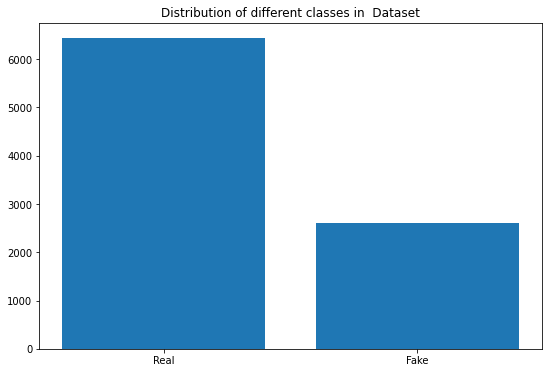

In [ ]:
image_folder = ['Real','Fake']
nimgs = {}
for i in image_folder:
    nimages = len(os.listdir(path+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(9, 6))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.title('Distribution of different classes in  Dataset')
plt.show()

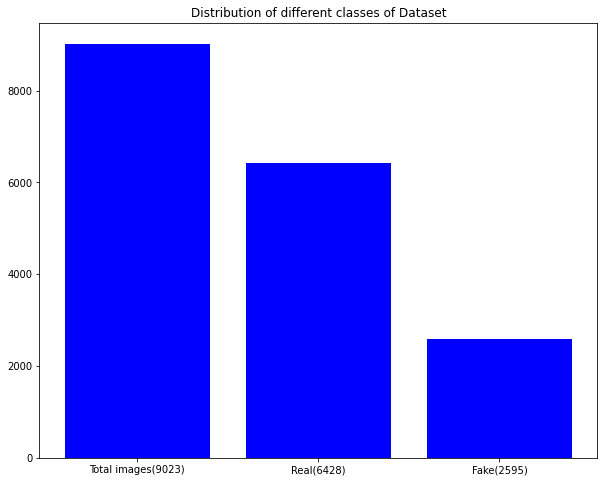

In [ ]:
x = np.array(["Total images(9023)", "Real(6428)", "Fake(2595)"])
y = np.array([9023, 6428, 2595])
plt.figure(figsize=(10, 8))
plt.bar(x, y, color = "blue")
plt.title('Distribution of different classes of Dataset')
plt.show()


In [ ]:
for i in ['Real', 'Fake']:
    print('Valid {} images are: '.format(i)+str(len(os.listdir(path+i+'/')))) 

Valid Real images are: 6434
Valid Fake images are: 2596


### Showing Image from Fake Dataset.


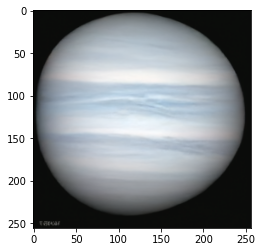

In [ ]:
# Fake  Images
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MyDataset/Fake/00003.png")
plt.imshow(img)


### Showing Image from Real Dataset.

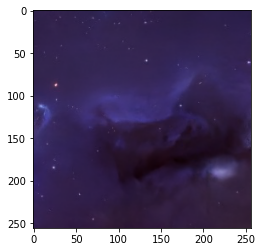

In [ ]:
# Real  Images
img = cv2.imread("/content/drive/MyDrive/Colab Notebooks/MyDataset/Real/1636371984_01335.png")
plt.imshow(img)

## Creatiing Model with all the necessary Layers. 
In this step all the layers along with all the parameters and sequence is provided. We have compiled this model after several Trails and Tests. 

In [ ]:
model= Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=(224,224,3))) 
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid')) 
model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam', metrics=['accuracy'])

#Model Summary

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      36928     
                                                                 
 dropout (Dropout)           (None, 108, 108, 64)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 128)     73856     
                                                        

#Image Generators on Train set

In [ ]:
train_datagen= image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
)
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/Dataset/train',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

Found 6317 images belonging to 2 classes.


#Train Class Image Labels

In [ ]:
train_generator.class_indices

{'Fake': 0, 'Real': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    '//content/Dataset/val',
    target_size=(224,224),
    batch_size=32,
    class_mode='binary')

Found 1805 images belonging to 2 classes.


#Model Training
This steps is the most important step which depicts the model training process using an epoch of 100. we have presented the metrics of Training accuracy, Training loss, Validation Accuracy and Validation Loss.

In [ ]:
hist=model.fit_generator(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    )

<ipython-input-20-16c035d25459>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(


Epoch 1/100
198/198 [==============================] - 98s 441ms/step - loss: 0.5026 - accuracy: 0.7516 - val_loss: 0.4024 - val_accuracy: 0.7989
Epoch 2/100
198/198 [==============================] - 87s 440ms/step - loss: 0.3963 - accuracy: 0.8111 - val_loss: 0.3506 - val_accuracy: 0.8343
Epoch 3/100
198/198 [==============================] - 84s 426ms/step - loss: 0.3492 - accuracy: 0.8430 - val_loss: 0.3130 - val_accuracy: 0.8654
Epoch 4/100
198/198 [==============================] - 87s 439ms/step - loss: 0.3342 - accuracy: 0.8518 - val_loss: 0.3406 - val_accuracy: 0.8305
Epoch 5/100
198/198 [==============================] - 84s 425ms/step - loss: 0.3264 - accuracy: 0.8556 - val_loss: 0.3032 - val_accuracy: 0.8560
Epoch 6/100
198/198 [==============================] - 87s 437ms/step - loss: 0.3127 - accuracy: 0.8623 - val_loss: 0.3079 - val_accuracy: 0.8643
Epoch 7/100
198/198 [==============================] - 84s 426ms/step - loss: 0.2974 - accuracy: 0.8686 - val_loss: 0.3001 -

#Plots to Show Metrics
The below given are some of the graphs that are showing the model accuracy and loss values.

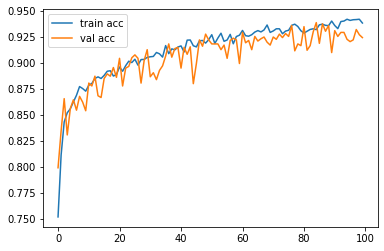

In [ ]:
# accuracies

plt.plot(hist.history['accuracy'], label='train acc')

plt.plot(hist.history['val_accuracy'], label='val acc')

plt.legend()

plt.savefig('My Model.png')

plt.show()

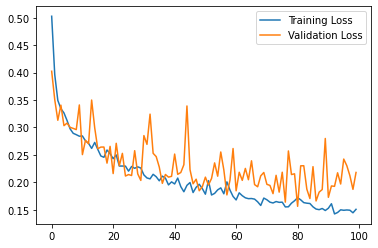

In [ ]:
# loss
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.legend()
plt.savefig('CNN Classification Loss.png')
plt.show()

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

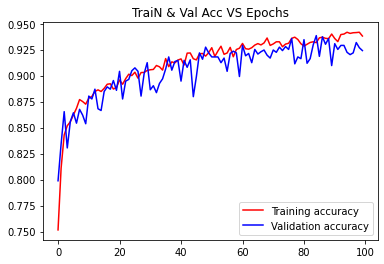

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('TraiN & Val Acc VS Epochs')
plt.legend(loc=0)
plt.figure()
plt.show()

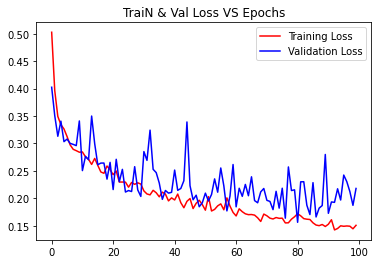

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(acc))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('TraiN & Val Loss VS Epochs')
plt.legend(loc=0)
plt.figure()
plt.show()

#Saving Model

In [ ]:
model.save("model_adv.h5")


#Final Model Evaluation

In [ ]:
score=model.evaluate_generator(train_generator)

<ipython-input-27-bb2052850009>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score=model.evaluate_generator(train_generator)


In [ ]:
print('Test Loss:', score[0])
print('Test accuracy:', score[1]*100)

In [ ]:
model.evaluate_generator(validation_generator)

<ipython-input-29-8951cfd684a1>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  model.evaluate_generator(validation_generator)


[0.21791395545005798, 0.9240997433662415]